<a href="https://colab.research.google.com/github/kankekarsaurabh/Machine-learning/blob/main/Yeast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
yeast = fetch_ucirepo(id=110)

yeast
# data (as pandas dataframes)
X = yeast.data.features
y = yeast.data.targets

# metadata
print(yeast.metadata)

# variable information
print(yeast.variables)


{'uci_id': 110, 'name': 'Yeast', 'repository_url': 'https://archive.ics.uci.edu/dataset/110/yeast', 'data_url': 'https://archive.ics.uci.edu/static/public/110/data.csv', 'abstract': 'Predicting the Cellular Localization Sites of Proteins', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1484, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['localization_site'], 'index_col': ['Sequence_Name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Sat Oct 28 2023', 'dataset_doi': '10.24432/C5KG68', 'creators': ['Kenta Nakai'], 'intro_paper': None, 'additional_info': {'summary': 'Predicted Attribute: Localization site of protein. ( non-numeric ).\r\n\r\nThe references below describe a predecessor to this dataset and its development. They also give results (not cross-validated) for classification by a rule-based expert system with that version of th

Shape: (1484, 8)

Summary Stats:
                mcg          gvh          alm          mit          erl  \
count  1484.000000  1484.000000  1484.000000  1484.000000  1484.000000   
mean      0.500121     0.499933     0.500034     0.261186     0.504717   
std       0.137299     0.123924     0.086670     0.137098     0.048351   
min       0.110000     0.130000     0.210000     0.000000     0.500000   
25%       0.410000     0.420000     0.460000     0.170000     0.500000   
50%       0.490000     0.490000     0.510000     0.220000     0.500000   
75%       0.580000     0.570000     0.550000     0.320000     0.500000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               pox          vac          nuc  
count  1484.000000  1484.000000  1484.000000  
mean      0.007500     0.499885     0.276199  
std       0.075683     0.057797     0.106491  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.480000     0.220000  
50%       0.00000

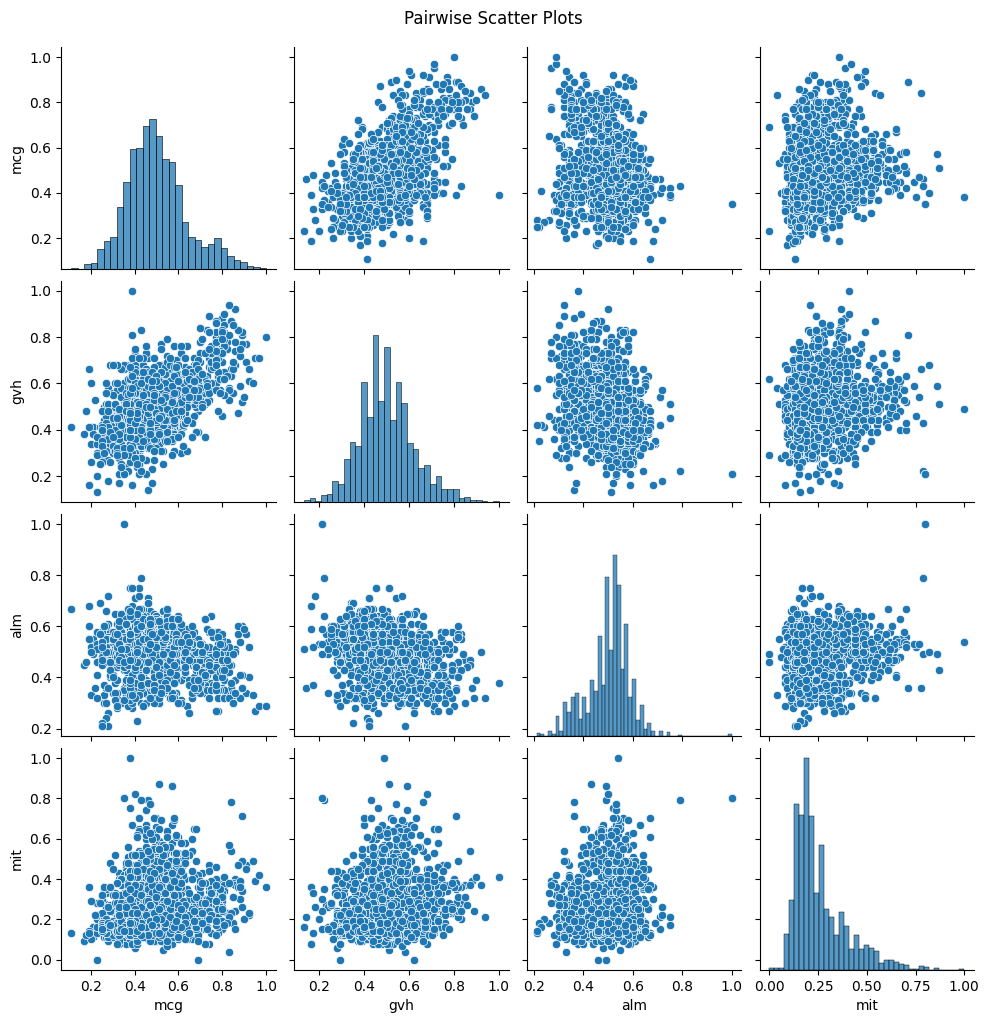

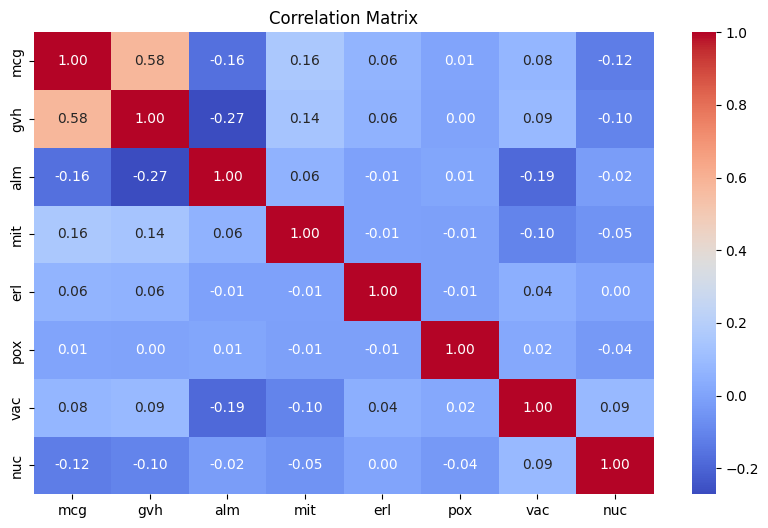

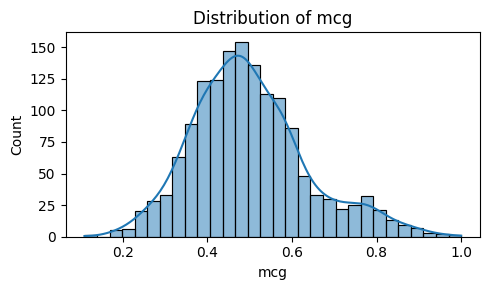

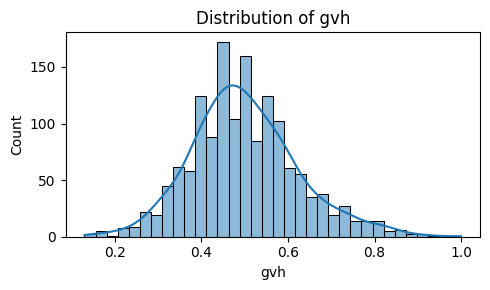

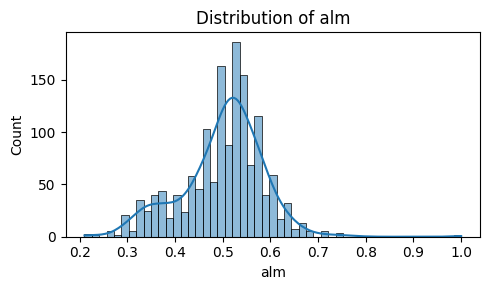

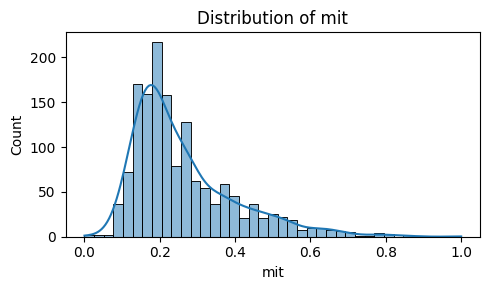

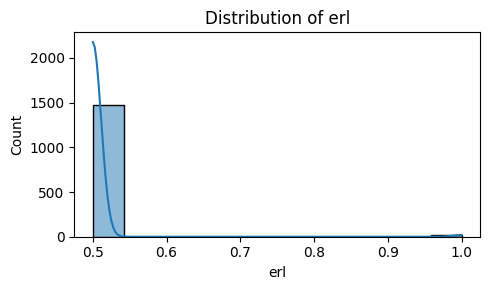

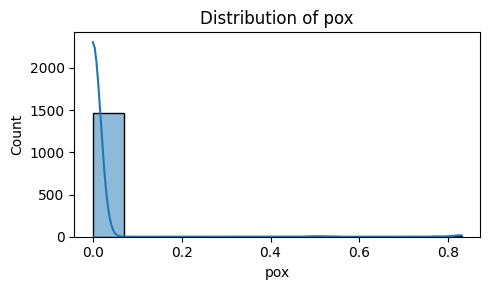

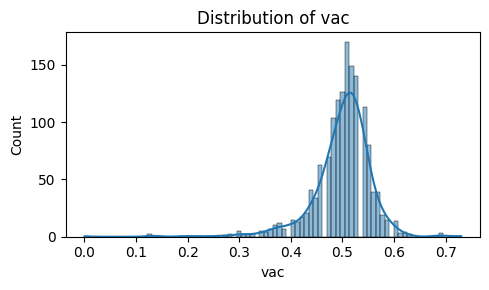

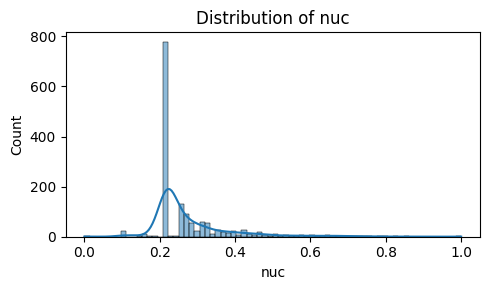

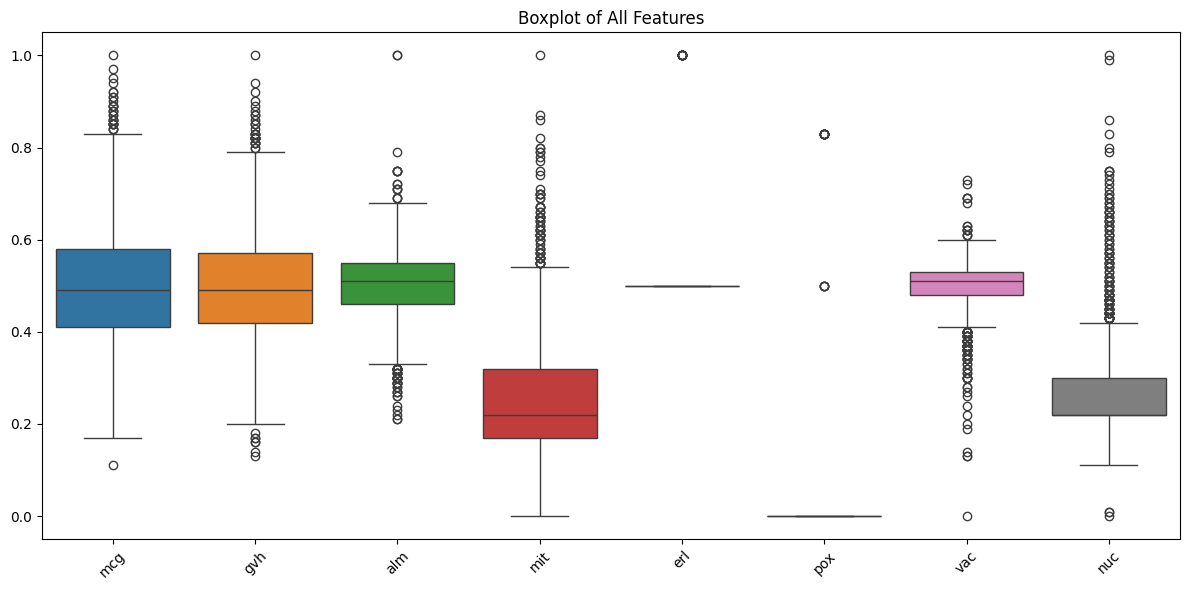

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# Load dataset
yeast = fetch_ucirepo(id=110)
X = yeast.data.features.copy()
X = X.astype(float)

# Basic Info
print("Shape:", X.shape)
print("\nSummary Stats:\n", X.describe())
print("\nMissing values:\n", X.isnull().sum())

# 1. Pairplot (small subset due to 8 features)
sns.pairplot(X[['mcg', 'gvh', 'alm', 'mit']])
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 3. Distribution Plots for Each Feature
for col in X.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# 4. Boxplots to Check for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# Load dataset
yeast = fetch_ucirepo(id=110)
X = yeast.data.features.copy()
X = X.astype(float)

# Step 1: Drop low-variance feature
X = X.drop(columns=["erl"])

# Step 2: Log-transform skewed features
X["mit"] = np.log1p(X["mit"])     # log(1 + mit)
X["nuc"] = np.log1p(X["nuc"])     # log(1 + nuc)

# Final feature set ready
print("✅ Final Features:")
print(X.head())


✅ Final Features:
    mcg   gvh   alm       mit  pox   vac       nuc
0  0.58  0.61  0.47  0.122218  0.0  0.48  0.198851
1  0.43  0.67  0.48  0.239017  0.0  0.53  0.198851
2  0.64  0.62  0.49  0.139762  0.0  0.53  0.198851
3  0.58  0.44  0.57  0.122218  0.0  0.54  0.198851
4  0.42  0.44  0.48  0.431782  0.0  0.48  0.198851


Simulate Titer variable

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Create random weights for each feature
weights = np.random.uniform(0.5, 2.0, size=X.shape[1])

# Simulate noise
noise = np.random.normal(loc=0, scale=0.2, size=X.shape[0])

# Create synthetic target variable (titer)
y = X.dot(weights) + noise
y = pd.Series(y, name="simulated_titer")

# Quick check
print("✅ Simulated Titer Values (first 5):")
print(y.head())


✅ Simulated Titer Values (first 5):
0    3.237543
1    3.556094
2    3.241714
3    2.953107
4    3.018884
Name: simulated_titer, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Step 3: Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    print(f"{name} ➤ R²: {r2:.3f}, RMSE: {rmse:.3f}")


Linear Regression ➤ R²: 0.785, RMSE: 0.200
Random Forest ➤ R²: 0.742, RMSE: 0.219


<ipython-input-9-e01eb797ea05>:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


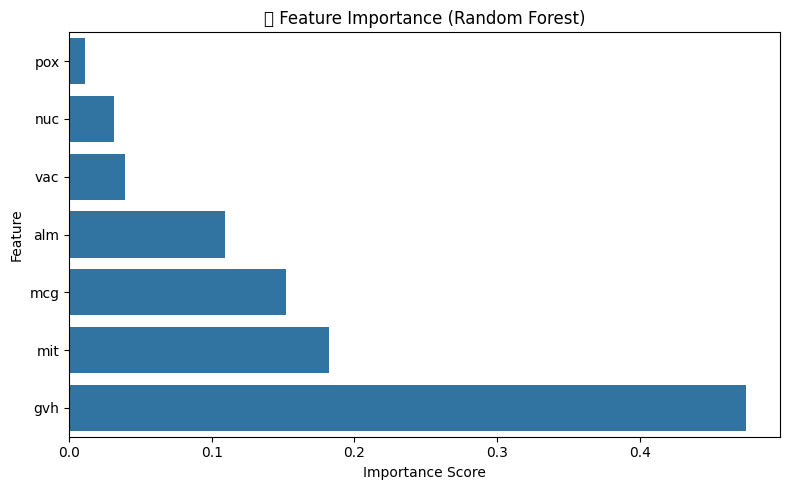

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get trained Random Forest model
rf_model = models["Random Forest"]

# Create importance series
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("🔍 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Feature Importance Analysis: Using a Random Forest model, we observed that the gvh feature contributed the most to simulated titer prediction, accounting for over 45% of the model’s decision-making. Other moderately important features included mit, mcg, and alm, while pox, nuc, and vac had minimal impact. These insights confirm that some biological variables are more linearly tied to the target, while sparse or low-variance features provide limited predictive power.